In [1]:
import sys
sys.path.append("..")

from algorithms import *
from analysis_util.visualize import *
from classes.environment import Environment

# Used for seed in np.random
Reproduce = 2023

In [2]:
env = Environment()
Qs = [1 + 0.5*i for i in range(7)]
Thetas = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]

Example Usage

In [3]:
np.random.seed(Reproduce)
pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t = simulate_episode_DQN(env, Qs, Thetas, T=1095, gamma=0.90)

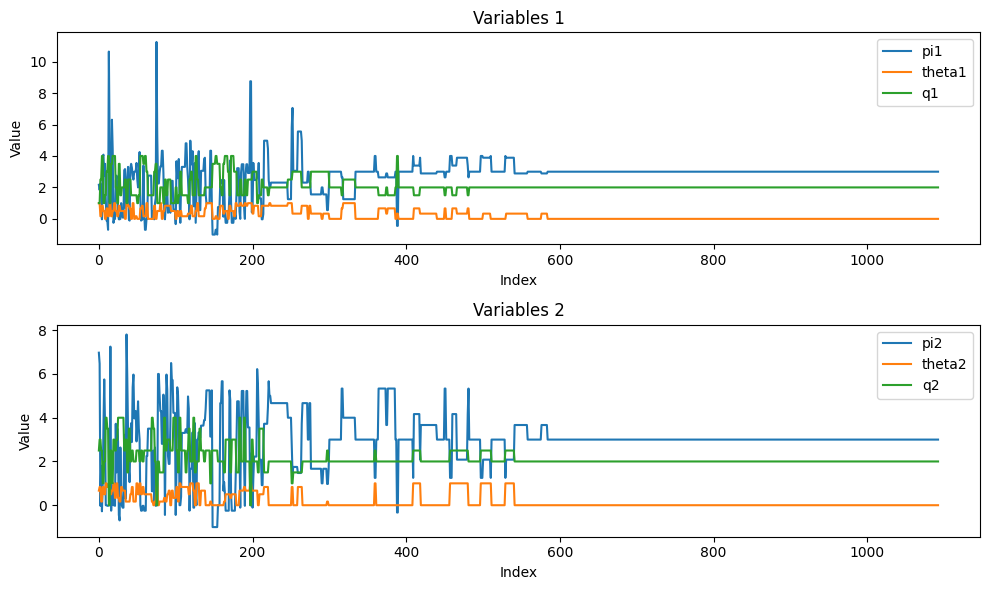

In [4]:
visualize_last_L(pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t)

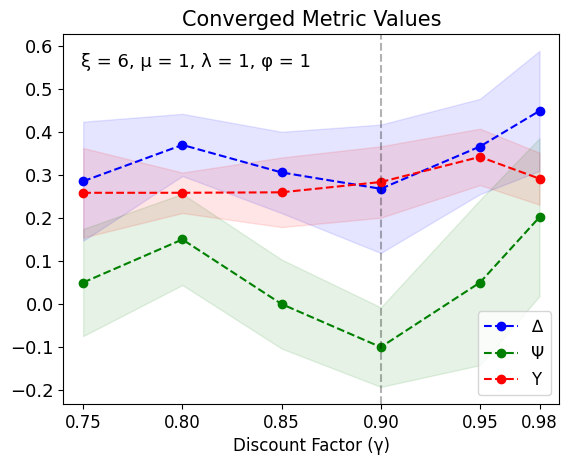

In [5]:
visualize_over_gamma(env, ["GoodDQN075", "GoodDQN08", "GoodDQN085", "GoodDQN09", "GoodDQN095", "GoodDQN098"], n_episodes=20, alt=True)

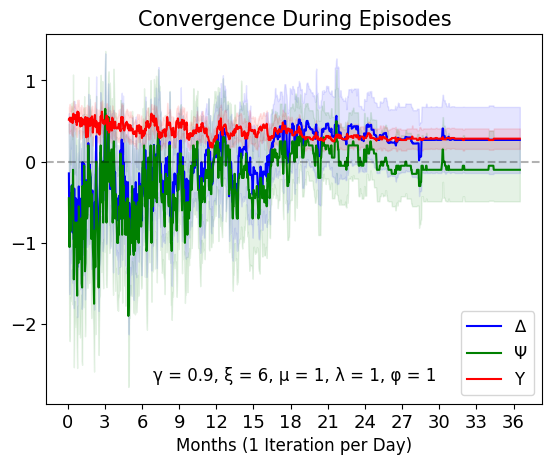

In [6]:
visualize_convergence_over_T_DQN(env, "GoodDQN09")